In [2]:
import pandas as pd
data = pd.read_csv('Mall_Customer.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
data_clus = data.iloc[:, 3:5]
data_clus.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


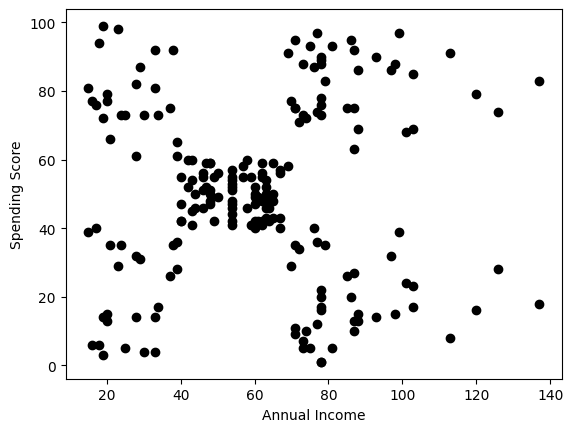

In [8]:
plt.scatter(data_clus.iloc[:, 0], data_clus.iloc[:, 1], c='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [9]:
clus_array = np.array(data_clus)
print(clus_array)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [163]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(clus_array)
data_scaled

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

In [164]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

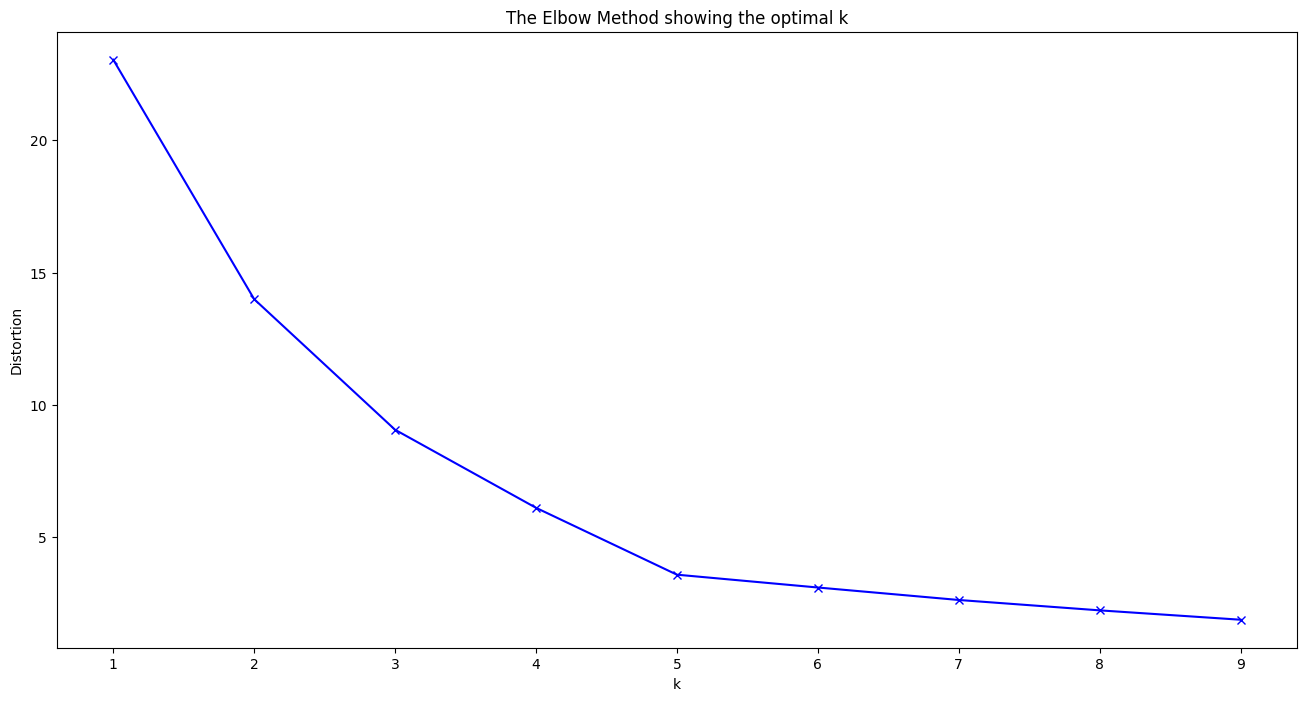

In [165]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [253]:
kmeanModel = KMeans(n_clusters=5, n_init=10)
kmeanModel.fit(data_scaled)

KMeans(n_clusters=5, n_init=10)

In [254]:
print(kmeanModel.cluster_centers_)

[[0.33029751 0.49508692]
 [0.58638083 0.82783883]
 [0.6        0.16443149]
 [0.08792846 0.79962894]
 [0.09265859 0.20319432]]


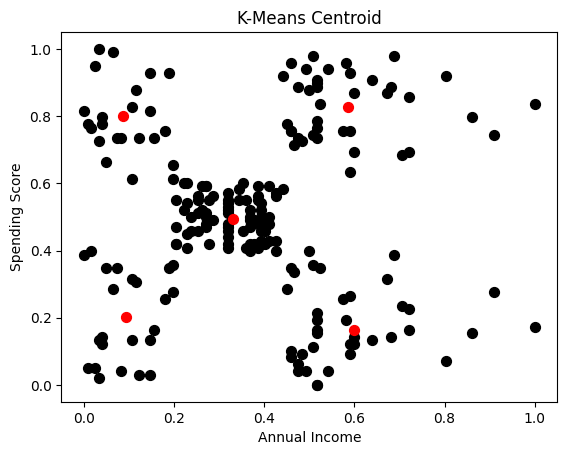

In [255]:
plt.scatter(data_scaled[:, 0], data_scaled[:,1], s=50, c='black', marker='o', alpha=1)
centers =kmeanModel.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=1, marker='o');
plt.title('K-Means Centroid')
plt.xlabel('Annual Income')
plt.ylabel("Spending Score")
plt.show()

In [256]:
y_kmeans = kmeanModel.predict(data_scaled)

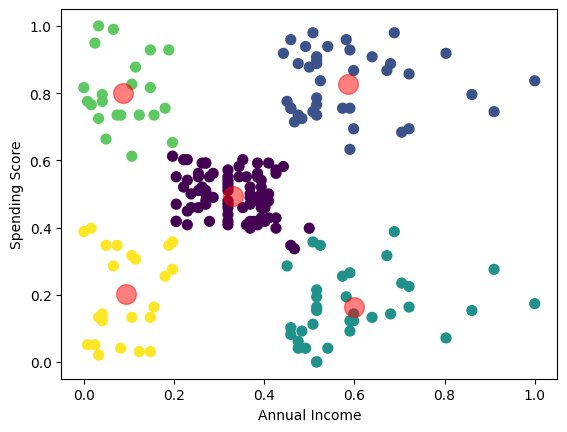

In [257]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeanModel.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5);
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [270]:
result =pd.DataFrame(data=y_kmeans)
result.columns = ['cluster']
result.head()

,cluster
0,4
1,3
2,4
3,3
4,4


In [269]:
output = pd.concat([data, result], axis=1)
output.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


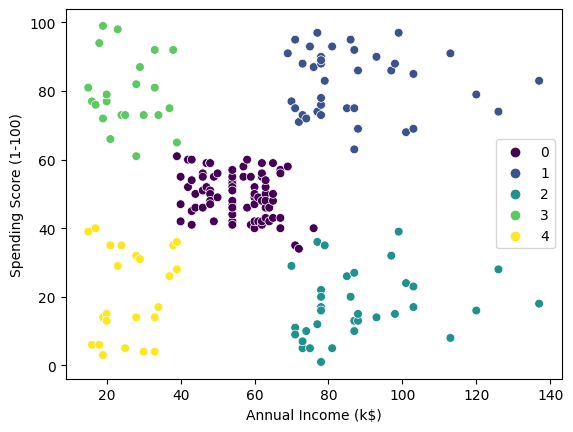

In [260]:
import seaborn as sns

sns.scatterplot(x=output.iloc[:, 3], y=output.iloc[:, 4], hue=output.iloc[:, 5], data=output, palette='viridis', s=40, legend='full');
plt.legend(loc='center right', fontsize='10');

In [262]:
output.to_csv('data_output.csv', index=False)

In [274]:
result_cluster_1 = output[output['cluster'] == 2];
print(result_cluster_1)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
124         125  Female   23                  70                      29   
128         129    Male   59                  71                      11   
130         131    Male   47                  71                       9   
134         135    Male   20                  73                       5   
136         137  Female   44                  73                       7   
138         139    Male   19                  74                      10   
140         141  Female   57                  75                       5   
144         145    Male   25                  77                      12   
146         147    Male   48                  77                      36   
148         149  Female   34                  78                      22   
150         151    Male   43                  78                      17   
152         153  Female   44                  78                      20   
154         